Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

Nama: [Isi Nama Anda]

Email: [Isi Email Anda]

Id Dicoding: [Isi ID Dicoding Anda]

# Persiapan

## Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from sklearn.impute import SimpleImputer
import joblib # Untuk menyimpan model

In [2]:
# Atur opsi tampilan pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

In [3]:
from google.colab import files
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path, delimiter=';')

Saving data.csv to data.csv


In [4]:
print("Dataset berhasil dimuat.")
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

Dataset berhasil dimuat.
Jumlah baris: 4424, Jumlah kolom: 37


# Data Understanding

## Memahami data awal, distribusi, dan informasi dasar

### Deskripsi Bisnis

* **Tujuan**: Mendeteksi mahasiswa yang berpotensi dropout sedini mungkin.
* **Masalah**: Tingginya angka dropout mahasiswa di Jaya Jaya Institut.
* **Manfaat Model**: Memungkinkan institusi memberikan bimbingan khusus kepada mahasiswa yang teridentifikasi berisiko dropout, sehingga dapat menekan angka dropout dan meningkatkan reputasi institusi.


In [5]:
print("\n--- Informasi Dataset ---")
df.info()


--- Informasi Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification               

In [6]:
print("\n--- Statistik Deskriptif (Fitur Numerik) ---")
print(df.describe())


--- Statistik Deskriptif (Fitur Numerik) ---
       Marital_status  Application_mode  Application_order       Course  Daytime_evening_attendance  Previous_qualification  Previous_qualification_grade  Nacionality  Mothers_qualification  Fathers_qualification  Mothers_occupation  Fathers_occupation  Admission_grade    Displaced  Educational_special_needs       Debtor  Tuition_fees_up_to_date       Gender  Scholarship_holder  Age_at_enrollment  International  Curricular_units_1st_sem_credited  Curricular_units_1st_sem_enrolled  Curricular_units_1st_sem_evaluations  Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  Curricular_units_1st_sem_without_evaluations  Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  Curricular_units_2nd_sem_without_evaluations  Unemployment_rate  Inflation_rate          GDP
count     4424.000000       4424.000000        44

In [7]:
print("\n--- Statistik Deskriptif (Fitur Kategorikal) ---")
print(df.describe(include='object'))


--- Statistik Deskriptif (Fitur Kategorikal) ---
          Status
count       4424
unique         3
top     Graduate
freq        2209


In [8]:
print("\n--- Pengecekan Nilai yang Hilang (Missing Values) ---")
print(df.isnull().sum())


--- Pengecekan Nilai yang Hilang (Missing Values) ---
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                           

In [9]:
print("\n--- Distribusi Variabel Target (Status) ---")
print(df['Status'].value_counts())


--- Distribusi Variabel Target (Status) ---
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


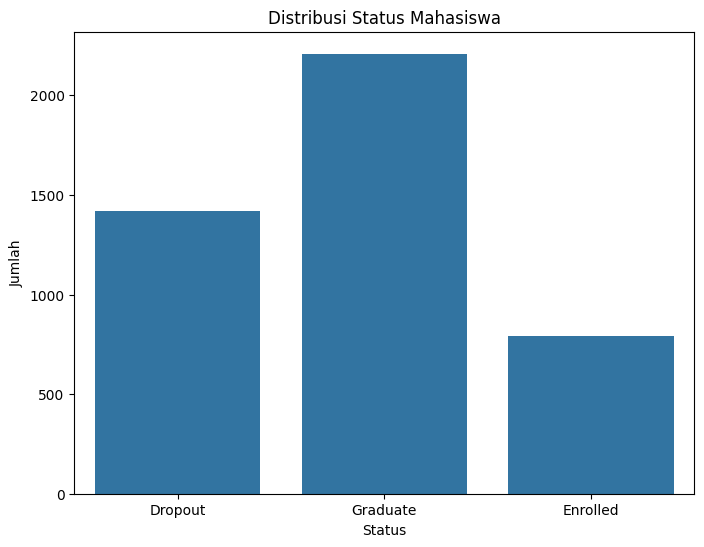

In [10]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status')
plt.title('Distribusi Status Mahasiswa')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

## Eksplorasi Data (EDA)

### Identifikasi fitur numerik dan kategorikal

In [11]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()
# 'Status' adalah target, jadi kita keluarkan dari list fitur kategorikal untuk EDA fitur
if 'Status' in categorical_features:
    categorical_features.remove('Status')

print(f"\nFitur Numerik: {numerical_features}")
print(f"Fitur Kategorikal: {categorical_features}")


Fitur Numerik: ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']
Fitur Kategorikal: []


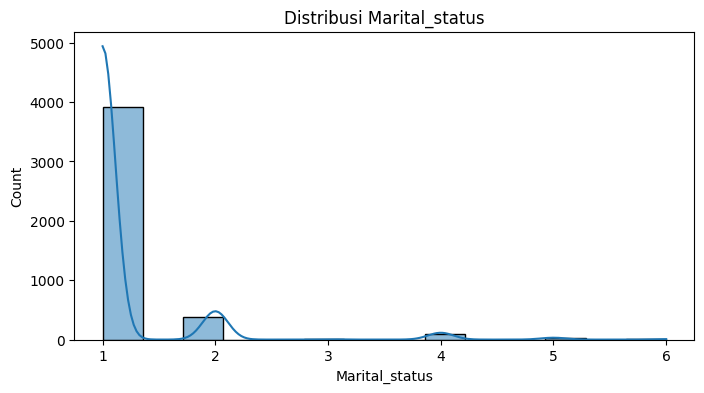

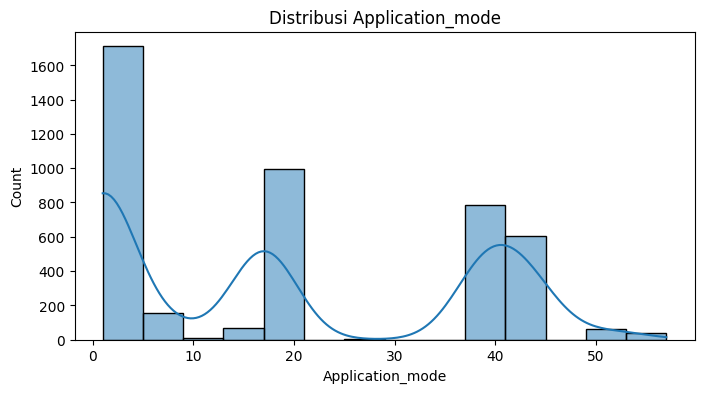

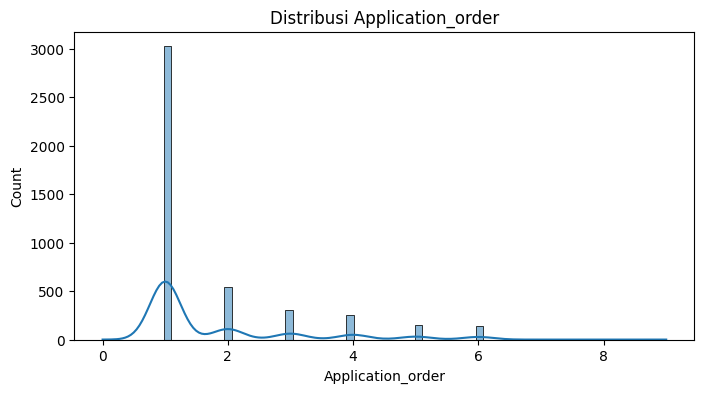

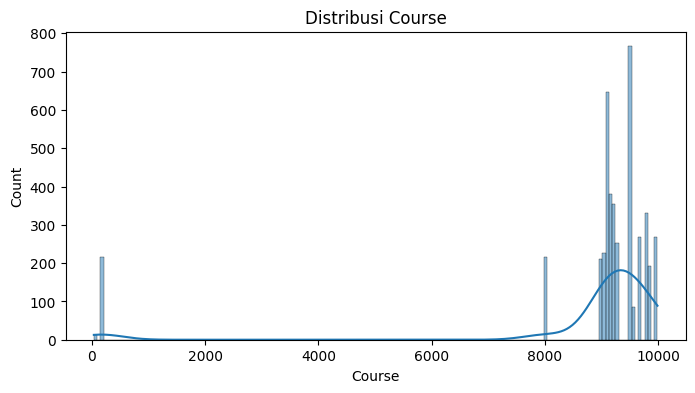

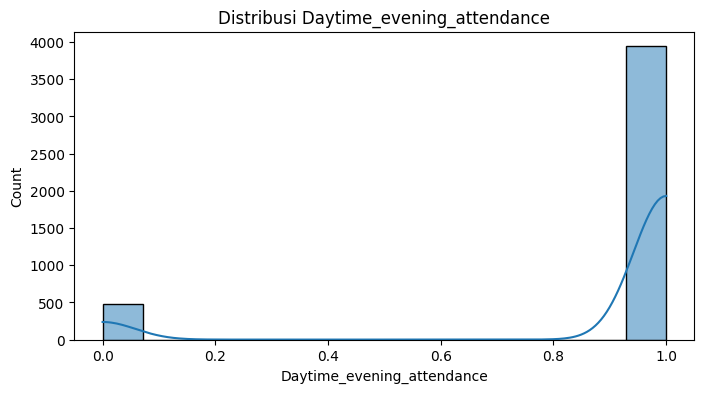

In [12]:
for col in numerical_features[:5]: # Batasi 5 fitur pertama untuk contoh
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

# Data Preparation / Preprocessing

## Menangani masalah pada data seperti missing values, encoding, scaling, dll.


### Konversi Target Variable

Mengubah masalah menjadi klasifikasi biner: Dropout (1) vs Non-Dropout (0)

Atau tetap multiclass, tergantung kebutuhan. Untuk kasus ini, fokus ke dropout.

In [13]:
print("\n--- Konversi Variabel Target ---")
df['Target'] = df['Status'].apply(lambda x: 1 if x == 'Dropout' else (0 if x == 'Graduate' else 2)) # Dropout: 1, Graduate: 0, Enrolled: 2
# Jika ingin biner (Dropout vs Non-Dropout):
# df['Target'] = df['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)
# print(df['Target'].value_counts())

# Jika data 'Status' tidak ada (karena masih pakai data sample), buat kolom 'Target' dummy
if 'Status' not in df.columns:
    print("Kolom 'Status' tidak ditemukan. Menggunakan target dummy untuk demonstrasi.")
    # Ini hanya untuk melanjutkan kode, pastikan 'Status' ada di data Anda
    df['Target'] = np.random.choice([0, 1, 2], size=df.shape[0])
    if 'Status' in categorical_features: categorical_features.remove('Status') # hapus jika ada

print("Nilai unik di Target setelah konversi:")
print(df['Target'].value_counts())


--- Konversi Variabel Target ---
Nilai unik di Target setelah konversi:
Target
0    2209
1    1421
2     794
Name: count, dtype: int64


### Pemisahan Fitur dan Target

In [14]:
X = df.drop(['Status', 'Target'], axis=1)
y = df['Target']

### Identifikasi Ulang Fitur Numerik dan Kategorikal (setelah drop target)

In [15]:
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist() # Ini akan kosong jika semua sudah numerik kecuali yang sengaja object

In [16]:
# Cek apakah ada fitur yang terbaca sebagai object padahal seharusnya numerik (atau sebaliknya)
print(f"\nFitur Numerik untuk Preprocessing: {numerical_features}")
print(f"Fitur Kategorikal untuk Preprocessing: {categorical_features}")


Fitur Numerik untuk Preprocessing: ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']
Fitur Kategorikal

### Membuat Pipeline Preprocessing

Imputasi untuk nilai hilang: median untuk numerik, modus untuk kategorikal

Scaling untuk numerik, One-Hot Encoding untuk kategorikal

In [17]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # sparse_output=False agar mudah dilihat
])

In [18]:
# Gabungkan transformer menggunakan ColumnTransformer
# Perlu berhati-hati jika tidak ada fitur kategorikal atau numerikal
preprocessor_steps = []
if numerical_features:
    preprocessor_steps.append(('num', numerical_pipeline, numerical_features))
if categorical_features:
    preprocessor_steps.append(('cat', categorical_pipeline, categorical_features))

if not preprocessor_steps:
    print("Tidak ada fitur numerik atau kategorikal yang teridentifikasi untuk preprocessing.")
    # Jika tidak ada fitur sama sekali (misal setelah drop), ini akan error.
    # Untuk kasus dataset ini, seharusnya ada kedua jenis fitur.
    # Jika hanya salah satu, ColumnTransformer tetap bisa jalan.
    # Jika tidak ada sama sekali, X_prepared akan kosong.

col_transformer = ColumnTransformer(transformers=preprocessor_steps, remainder='passthrough')

### Pembagian Data Training dan Testing

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y if y.nunique() > 1 else None) # stratify jika y punya lebih dari 1 kelas

print(f"\nBentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")
print(f"Bentuk y_train: {y_train.shape}")
print(f"Bentuk y_test: {y_test.shape}")


Bentuk X_train: (3539, 36)
Bentuk X_test: (885, 36)
Bentuk y_train: (3539,)
Bentuk y_test: (885,)


### Terapkan Preprocessing

In [20]:
# Fit preprocessor pada data training dan transform data training & testing
X_train_prepared = col_transformer.fit_transform(X_train)
X_test_prepared = col_transformer.transform(X_test)

In [21]:
# Dapatkan nama fitur setelah OneHotEncoding (jika ada fitur kategorikal)
try:
    feature_names_out = col_transformer.get_feature_names_out()
    X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=feature_names_out, index=X_train.index)
    X_test_prepared_df = pd.DataFrame(X_test_prepared, columns=feature_names_out, index=X_test.index)
    print("\nPreprocessing selesai. Contoh data setelah preprocessing (train):")
    print(X_train_prepared_df.head())
except Exception as e:
    print(f"Error saat mendapatkan nama fitur atau membuat DataFrame: {e}")
    print("Kemungkinan karena tidak ada fitur kategorikal atau masalah lain.")
    # Jika tidak ada fitur kategorikal, get_feature_names_out() mungkin perlu penyesuaian
    # atau cukup gunakan X_train_prepared (numpy array) langsung ke model.
    # Untuk kesederhanaan jika terjadi error, kita lanjutkan dengan array numpy
    X_train_prepared_df = pd.DataFrame(X_train_prepared, index=X_train.index) # Kolom akan jadi angka
    X_test_prepared_df = pd.DataFrame(X_test_prepared, index=X_test.index) # Kolom akan jadi angka
    print("\nPreprocessing selesai. Data setelah preprocessing (train) dalam bentuk array numpy atau DataFrame tanpa nama kolom spesifik:")
    print(X_train_prepared_df.head())


Preprocessing selesai. Contoh data setelah preprocessing (train):
      num__Marital_status  num__Application_mode  num__Application_order  num__Course  num__Daytime_evening_attendance  num__Previous_qualification  num__Previous_qualification_grade  num__Nacionality  num__Mothers_qualification  num__Fathers_qualification  num__Mothers_occupation  num__Fathers_occupation  num__Admission_grade  num__Displaced  num__Educational_special_needs  num__Debtor  num__Tuition_fees_up_to_date  num__Gender  num__Scholarship_holder  num__Age_at_enrollment  num__International  num__Curricular_units_1st_sem_credited  num__Curricular_units_1st_sem_enrolled  num__Curricular_units_1st_sem_evaluations  num__Curricular_units_1st_sem_approved  num__Curricular_units_1st_sem_grade  num__Curricular_units_1st_sem_without_evaluations  num__Curricular_units_2nd_sem_credited  num__Curricular_units_2nd_sem_enrolled  num__Curricular_units_2nd_sem_evaluations  num__Curricular_units_2nd_sem_approved  num__Curricular_

# Modeling

## Membangun beberapa model machine learning untuk klasifikasi

In [22]:
# Definisikan model-model yang akan digunakan
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [23]:
# Simpan hasil evaluasi
results = {}
trained_models = {}


--- Melatih Model: Logistic Regression ---
Akurasi Training Logistic Regression: 0.7711
Akurasi Test Logistic Regression: 0.7435

Laporan Klasifikasi (Test Data):
              precision    recall  f1-score   support

Graduate (0)       0.83      0.86      0.84       442
 Dropout (1)       0.81      0.78      0.79       284
Enrolled (2)       0.38      0.36      0.37       159

    accuracy                           0.74       885
   macro avg       0.67      0.67      0.67       885
weighted avg       0.74      0.74      0.74       885



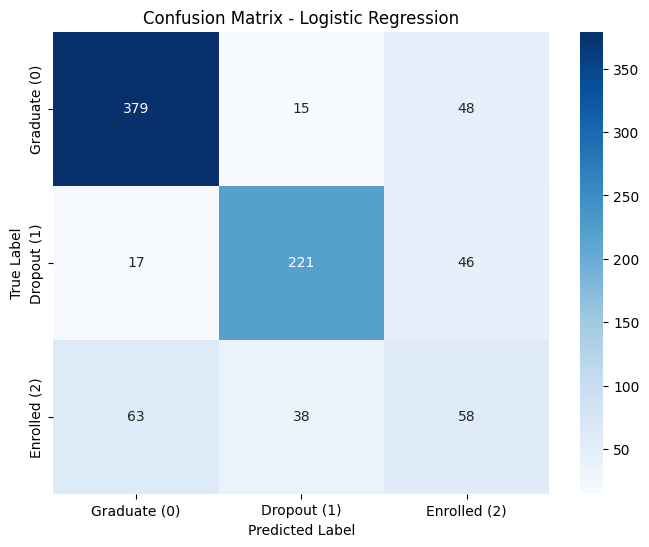


--- Melatih Model: Random Forest ---
Akurasi Training Random Forest: 1.0000
Akurasi Test Random Forest: 0.7864

Laporan Klasifikasi (Test Data):
              precision    recall  f1-score   support

Graduate (0)       0.80      0.93      0.86       442
 Dropout (1)       0.84      0.82      0.83       284
Enrolled (2)       0.56      0.33      0.42       159

    accuracy                           0.79       885
   macro avg       0.73      0.69      0.70       885
weighted avg       0.77      0.79      0.77       885



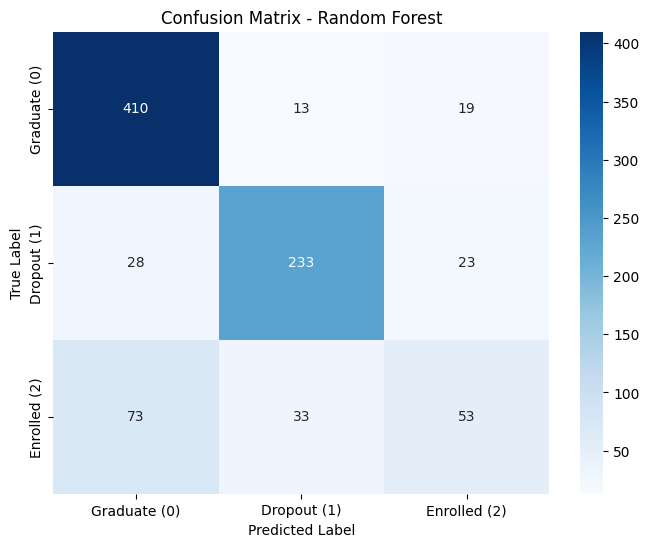


--- Melatih Model: Gradient Boosting ---
Akurasi Training Gradient Boosting: 0.8406
Akurasi Test Gradient Boosting: 0.7650

Laporan Klasifikasi (Test Data):
              precision    recall  f1-score   support

Graduate (0)       0.81      0.90      0.85       442
 Dropout (1)       0.82      0.80      0.81       284
Enrolled (2)       0.45      0.35      0.39       159

    accuracy                           0.76       885
   macro avg       0.70      0.68      0.68       885
weighted avg       0.75      0.76      0.76       885



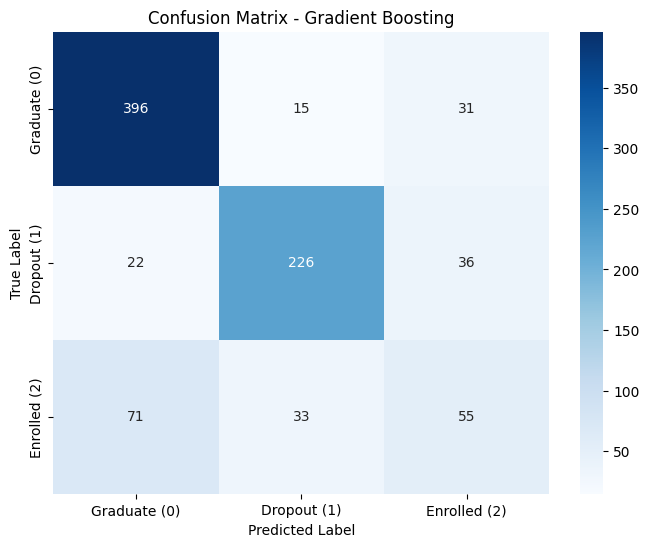

In [24]:
# Looping untuk melatih dan mengevaluasi setiap model
for model_name, model in models.items():
    print(f"\n--- Melatih Model: {model_name} ---")

    # Membuat pipeline lengkap: preprocessing + model
    full_pipeline = Pipeline([
        ('preprocessor', col_transformer),
        ('classifier', model)
    ])

    # Melatih model
    full_pipeline.fit(X_train, y_train)
    trained_models[model_name] = full_pipeline # Simpan model yang sudah dilatih

    # Membuat prediksi
    y_pred_train = full_pipeline.predict(X_train)
    y_pred_test = full_pipeline.predict(X_test)
    y_proba_test = None # Inisialisasi y_proba_test
    if hasattr(model, "predict_proba"):
        y_proba_test = full_pipeline.predict_proba(X_test)


    # Evaluasi
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f"Akurasi Training {model_name}: {accuracy_train:.4f}")
    print(f"Akurasi Test {model_name}: {accuracy_test:.4f}")
    print("\nLaporan Klasifikasi (Test Data):")
    # Tentukan target names berdasarkan mapping: 0: Graduate, 1: Dropout, 2: Enrolled
    # Sesuaikan jika mapping target Anda berbeda
    target_names_report = ['Graduate (0)', 'Dropout (1)', 'Enrolled (2)']
    # Jika target biner: ['Non-Dropout (0)', 'Dropout (1)']
    # target_names_report = ['Non-Dropout (0)', 'Dropout (1)']
    print(classification_report(y_test, y_pred_test, target_names=target_names_report, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names_report, yticklabels=target_names_report)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    results[model_name] = {
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'classification_report_test': classification_report(y_test, y_pred_test, target_names=target_names_report, output_dict=True, zero_division=0),
        'y_pred_test': y_pred_test,
        'y_proba_test': y_proba_test
    }

# Evaluation

## Membandingkan performa model dan memilih model terbaik
## Fokus pada metrik yang relevan dengan tujuan bisnis (misal, recall untuk kelas 'Dropout')


In [25]:
print("\n--- Ringkasan Hasil Evaluasi Model ---")
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"  Akurasi Test: {metrics['accuracy_test']:.4f}")
    # Tampilkan recall untuk kelas 'Dropout' (kelas 1)
    if 'Dropout (1)' in metrics['classification_report_test']:
        print(f"  Recall untuk Dropout (1): {metrics['classification_report_test']['Dropout (1)']['recall']:.4f}")
        print(f"  Precision untuk Dropout (1): {metrics['classification_report_test']['Dropout (1)']['precision']:.4f}")
        print(f"  F1-score untuk Dropout (1): {metrics['classification_report_test']['Dropout (1)']['f1-score']:.4f}")
    else:
        print("  Metrik 'Dropout (1)' tidak ditemukan dalam laporan klasifikasi.")


--- Ringkasan Hasil Evaluasi Model ---

Model: Logistic Regression
  Akurasi Test: 0.7435
  Recall untuk Dropout (1): 0.7782
  Precision untuk Dropout (1): 0.8066
  F1-score untuk Dropout (1): 0.7921

Model: Random Forest
  Akurasi Test: 0.7864
  Recall untuk Dropout (1): 0.8204
  Precision untuk Dropout (1): 0.8351
  F1-score untuk Dropout (1): 0.8277

Model: Gradient Boosting
  Akurasi Test: 0.7650
  Recall untuk Dropout (1): 0.7958
  Precision untuk Dropout (1): 0.8248
  F1-score untuk Dropout (1): 0.8100


## Pemilihan Model Terbaik

Berdasarkan tujuan bisnis (mendeteksi dropout), model dengan **recall tertinggi untuk kelas 'Dropout'** mungkin menjadi pilihan utama, sambil tetap memperhatikan precision agar tidak terlalu banyak salah prediksi. Akurasi keseluruhan juga penting, tetapi tidak menjadi satu-satunya patokan.


In [26]:
# Contoh: memilih model terbaik berdasarkan recall 'Dropout (1)'
best_model_name = None
best_recall_dropout = -1.0

for model_name, metrics in results.items():
    if 'Dropout (1)' in metrics['classification_report_test']:
        recall_dropout = metrics['classification_report_test']['Dropout (1)']['recall']
        if recall_dropout > best_recall_dropout:
            best_recall_dropout = recall_dropout
            best_model_name = model_name

if best_model_name:
    print(f"\nModel terbaik berdasarkan Recall untuk 'Dropout' adalah: {best_model_name} dengan Recall: {best_recall_dropout:.4f}")
    best_model_pipeline = trained_models[best_model_name]
else:
    print("\nTidak dapat menentukan model terbaik berdasarkan metrik 'Dropout (1)'. Periksa output laporan klasifikasi.")
    # Jika tidak ada kelas 'Dropout (1)' (misalnya karena data sample sangat kecil dan tidak ada dropout di test set)
    # atau jika target Anda biner dan labelnya berbeda.
    # Anda mungkin perlu memilih model terbaik berdasarkan metrik lain atau akurasi keseluruhan.
    # Untuk fallback, pilih model dengan akurasi test tertinggi
    best_model_name = max(results, key=lambda k: results[k]['accuracy_test'])
    best_model_pipeline = trained_models[best_model_name]
    print(f"Sebagai fallback, model dengan akurasi test tertinggi dipilih: {best_model_name} (Akurasi: {results[best_model_name]['accuracy_test']:.4f})")


Model terbaik berdasarkan Recall untuk 'Dropout' adalah: Random Forest dengan Recall: 0.8204


## Menyimpan Model Terbaik (Contoh)

In [27]:
if best_model_name:
    model_filename = f'best_dropout_prediction_model_{best_model_name.replace(" ", "_").lower()}.pkl'
    joblib.dump(best_model_pipeline, model_filename)
    print(f"\nModel terbaik ({best_model_name}) telah disimpan sebagai {model_filename}")


Model terbaik (Random Forest) telah disimpan sebagai best_dropout_prediction_model_random_forest.pkl
